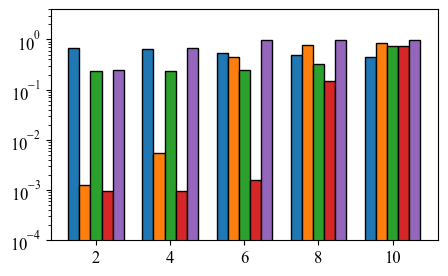

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np  # Import numpy for handling log10

# 文件名和对应颜色
file_colors = {
    'hybrid-6-2to10.csv': 'tab:blue',
    'qiskit-6-2to10.csv': 'tab:orange',
    'sapo_without_eigen-6-2to10.csv': 'tab:green',
    'sapo_without_scale-6-2to10.csv': 'tab:red',
    'sapo-6-2to10.csv': 'tab:purple'
}

# 存储每个文件的数据框
dfs = {}

# 读取CSV文件并计算绝对值平均值
for file_name, color in file_colors.items():
    df = pd.read_csv(file_name)
    df['tickers'] = df['tickers'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x != '[]' else [])
    df['acc'] = df['acc'].apply(abs)
    avg_values = df.groupby('num_qubits')['acc'].mean()
    dfs[file_name] = {'num_assets': avg_values.index, 'acc_avg': avg_values.values, 'color': color}

# Set font family and font size
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12  # Adjust the font size as needed

# 绘制柱状图
plt.figure(figsize=(5, 3))

bar_width = 0.3
bar_positions = []

for i, (file_name, data) in enumerate(dfs.items()):
    positions = [pos + (i - 2) * bar_width for pos in data['num_assets']]
    plt.bar(positions, data['acc_avg'], label=file_name, color=data['color'], width=bar_width, edgecolor='black')
    bar_positions.extend(positions)

# plt.xlabel('number of stocks', fontname='Times New Roman', fontsize=20)  # Increase font size
# plt.ylabel('accuracy', fontname='Times New Roman', fontsize=20)  # Increase font size
# plt.title('Average |acc| for Each num_assets', fontname='Times New Roman')

plt.yscale('log')  # Set the y-axis to logarithmic scale

# Place the legend above the plot
# plt.legend(loc='upper center', bbox_to_anchor=(1, 3), ncol=len(dfs), prop={'family': 'Times New Roman', 'size': 14})  # Adjust the font size in the legend

# Save the plot as an SVG file
plt.ylim(0.0001, 4)
plt.savefig('p1.svg', format='svg', bbox_inches='tight')

plt.show()
